In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('linear_data.csv')

In [36]:
df.head(5)

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [37]:
df[['x']].head()

,x
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [38]:
df['y'].head()

0    4.447692
1    5.024612
2    5.869593
3    4.722490
4    4.877101
Name: y, dtype: float64

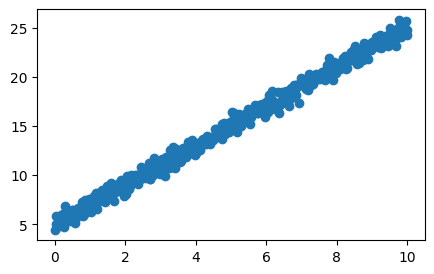

In [39]:
plt.figure(figsize=(5,3))
plt.scatter(df[['x']],df['y'])

In [40]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [41]:
df2 = pd.read_csv('nonlinear_data.csv')

In [42]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


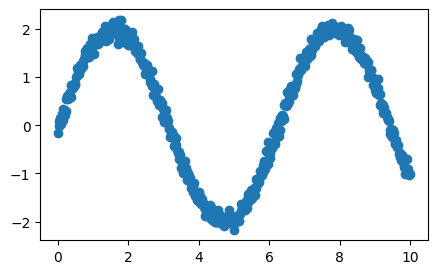

In [43]:
plt.figure(figsize=(5,3))
plt.scatter(df2[['x']], df2[['y']])

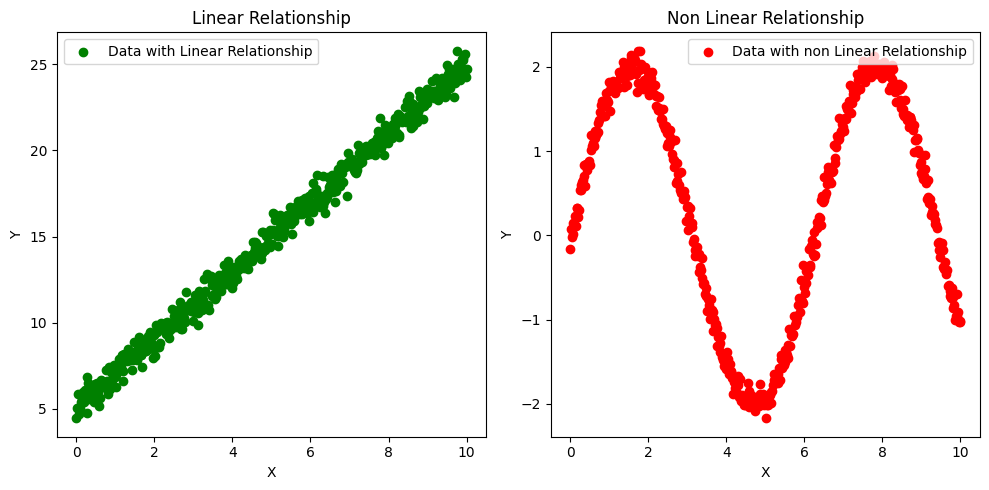

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df.x, df.y, color='green', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(df2.x, df2.y, color='red', label='Data with non Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [51]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [52]:
from sklearn.linear_model import LinearRegression

In [54]:
df.head()  # strong positive correlation

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [55]:
reg1 = LinearRegression()

In [56]:
reg1.fit(df[['x']], df[['y']])

LinearRegression()

In [57]:
reg1.score(df[['x']], df[['y']])

0.9928923730526016

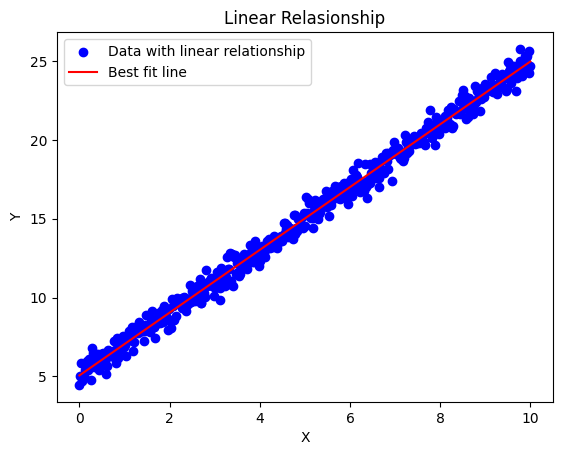

In [70]:
plt.scatter(df[['x']], df.y, color='blue', label='Data with linear relationship')
plt.plot(df[['x']], reg1.predict(df[['x']]), color='red', label = 'Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relasionship')

plt.legend()
plt.show()

## Non linar data

In [71]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [73]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [74]:
reg2 = LinearRegression()

In [75]:
reg2.fit(df2[['x']], df2.y)

LinearRegression()

In [77]:
reg2.score(df[['x']], df2.y)

0.004321199719043656

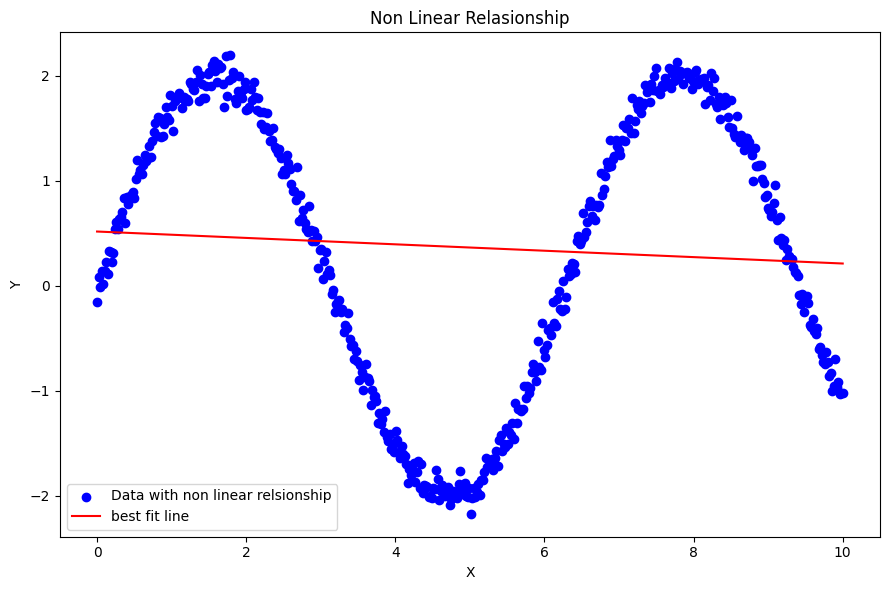

In [87]:
plt.figure(figsize=(9,6))
plt.scatter(df2.x, df2.y, color='blue', label = 'Data with non linear relsionship')
plt.plot(df[['x']], reg2.predict(df2[['x']]), color='red', label='best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Relasionship')

plt.tight_layout()
plt.legend()
plt.show()

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
poly = PolynomialFeatures(degree=6)

In [107]:
x_poly = poly.fit_transform(df2[['x']])

In [108]:
pd.DataFrame(x_poly).head()

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07


In [109]:
x_poly.shape

(500, 7)

In [110]:
reg_poly = LinearRegression()

In [111]:
reg_poly.fit(x_poly, df.y)

LinearRegression()

In [112]:
reg_poly.score(x_poly, df.y)

0.9929419015755971

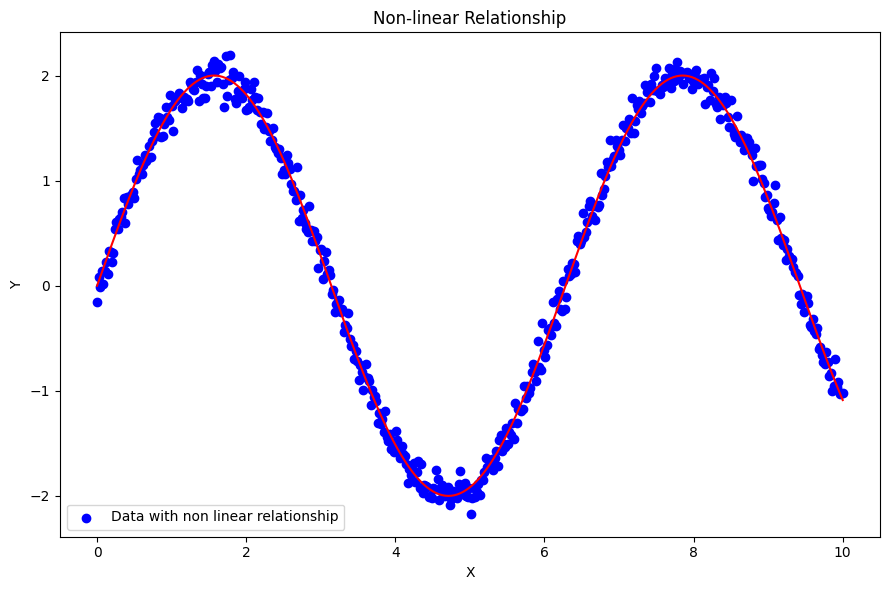

In [119]:
plt.figure(figsize=(9,6))
plt.scatter(df2.x, df2.y, color = 'blue', label='Data with non linear relationship')
plt.plot(df2.x, 2*np.sin(df2.x), color='red')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')

plt.legend()
plt.tight_layout()
plt.show()

## Testing overfit or bestfit

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
xtrain, xtest, ytrain, ytest = train_test_split(x_poly, df2.y, test_size = 0.25, random_state = 0)

In [124]:
xtrain.shape

(375, 7)

In [126]:
pd.DataFrame(xtrain).head()

,0,1,2,3,4,5,6
0,1.0,4.789579,22.940069,109.873274,526.246743,2520.500434,12072.136349
1,1.0,1.182365,1.397986,1.652930,1.954366,2.310773,2.732177
2,1.0,8.136273,66.198931,538.612544,4382.298456,35655.574612,290103.472795
3,1.0,7.835671,61.397745,481.092554,3769.683139,29537.998144,231450.045574
4,1.0,8.236473,67.839487,558.758096,4602.195941,37905.862356,312210.609788


In [127]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [129]:
reg_poly.fit(xtrain, ytrain)

LinearRegression()

In [130]:
reg_poly.score(xtrain, ytrain)

0.993296645178985

In [131]:
reg_poly.score(xtest, ytest)

0.9921870558218431